In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\End Of Year SALE Sales Analysis.csv",encoding=('ISO-8859-1'))

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df['Amount']=df['Amount'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


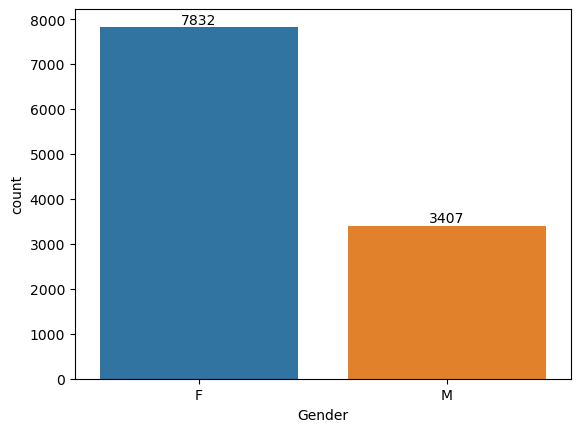

In [13]:
mf=sns.countplot(x='Gender',data=df)
for bars in mf.containers:
    mf.bar_label(bars)

In [16]:
sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

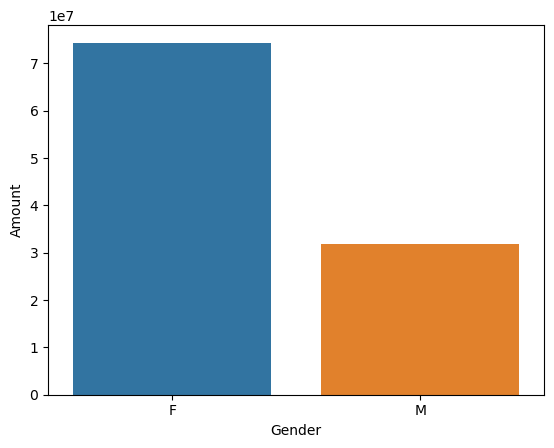

In [18]:
sns.barplot(x='Gender',y='Amount',data=sales_gender)

In Above Graph we can see the purchasing of womens are higher than men 

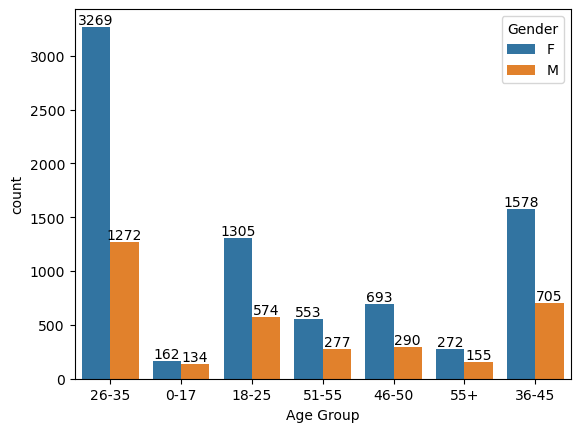

In [21]:
gg=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in gg.containers:
    gg.bar_label(bars)

In [23]:
sales_age_group=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

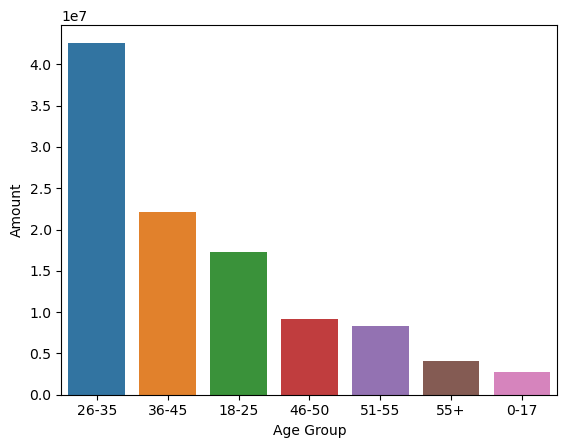

In [24]:
sns.barplot(x='Age Group',y='Amount',data=sales_age_group)

In above graph we can see that ,the age group of 26-35yrs female orderd the most.

<Axes: xlabel='State', ylabel='Orders'>

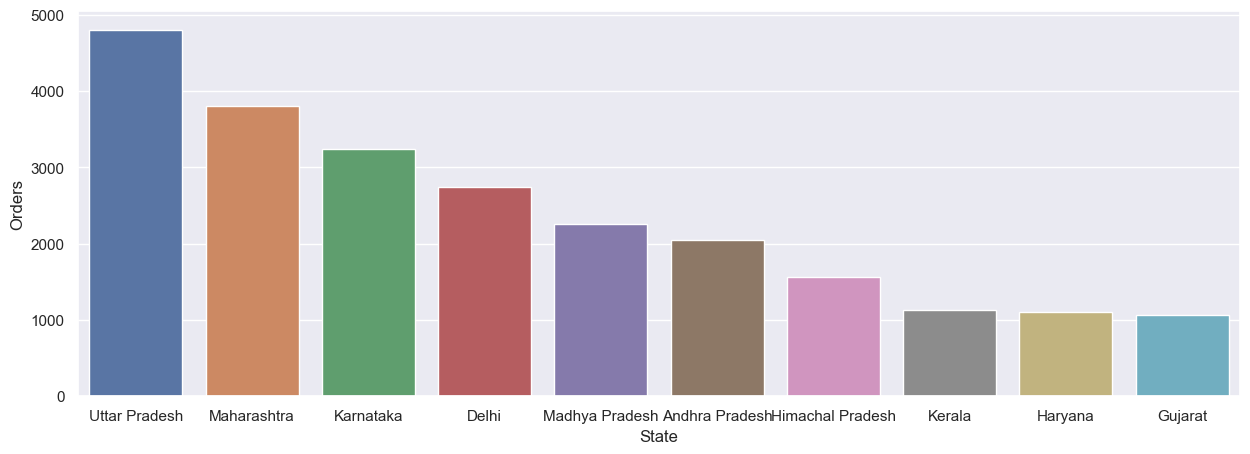

In [25]:
st=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=st)

In above graph we can we the top 10 state order wise

<Axes: xlabel='State', ylabel='Amount'>

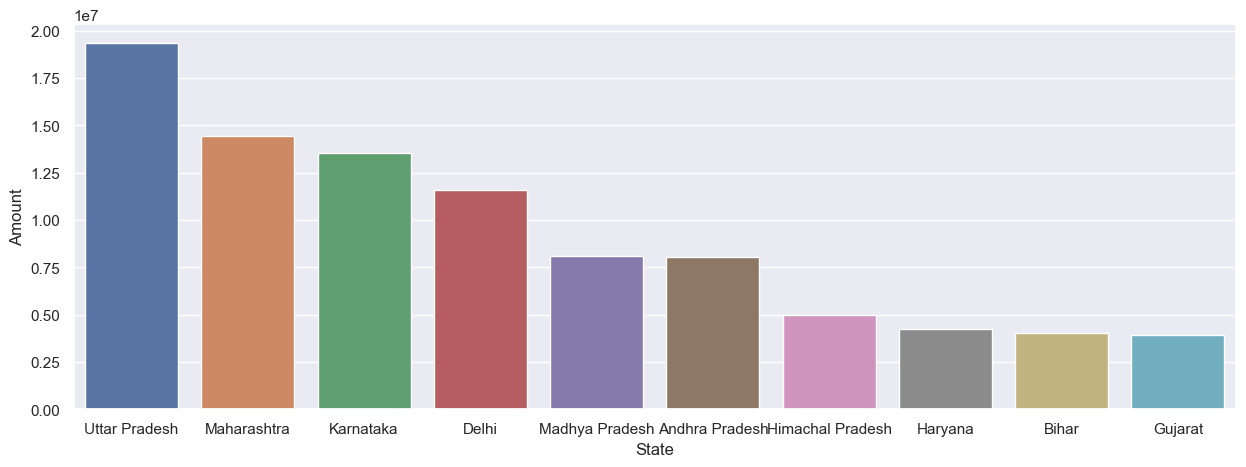

In [27]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

In above Graph we can we top 10 states sales wise.

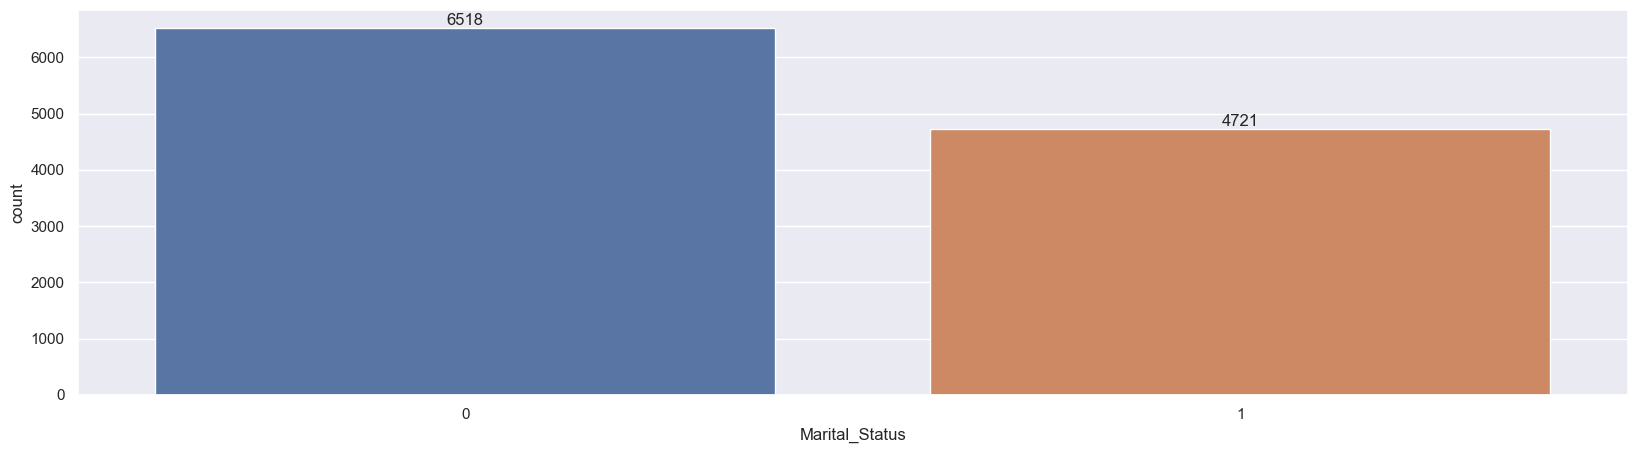

In [37]:
ms=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(7,10)})
for bars in ms.containers:
    ms.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

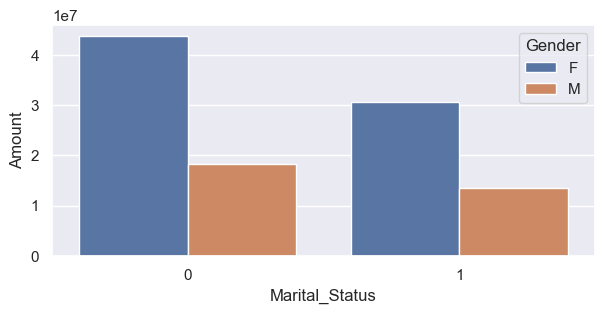

In [35]:
sales_ms=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(7,3)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_ms,hue='Gender')

In above graph we can see that married womens buying more items

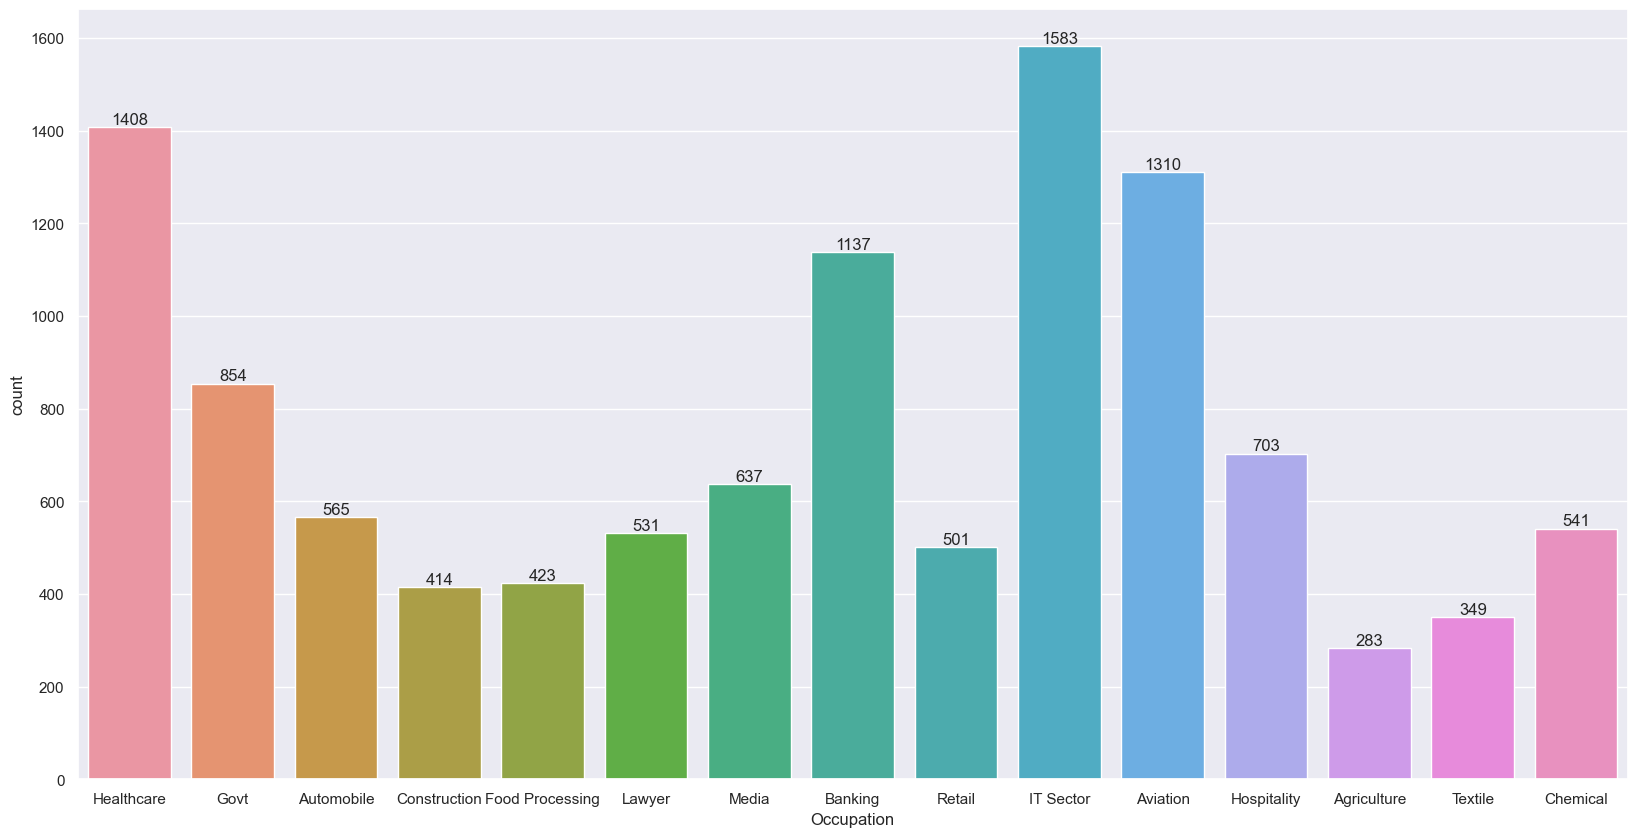

In [51]:
occ=sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(20,5)})
for bars in occ.containers:
    occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

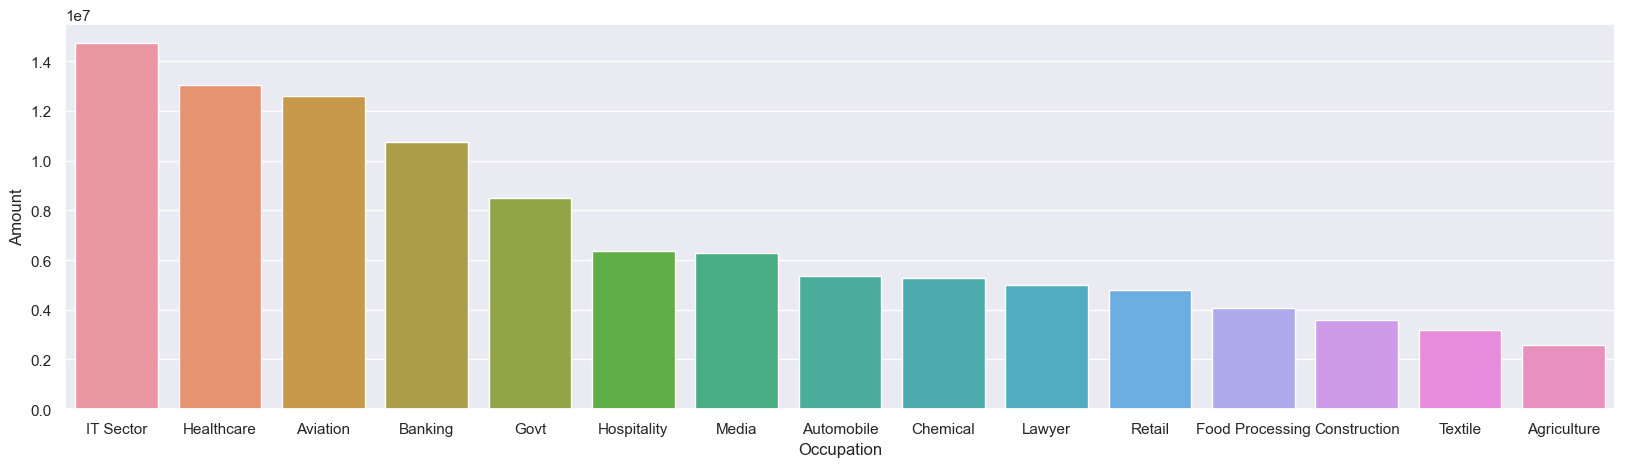

In [63]:
sales_occ=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occ)

In above graph we can see that the IT sector has the highest purchasing power

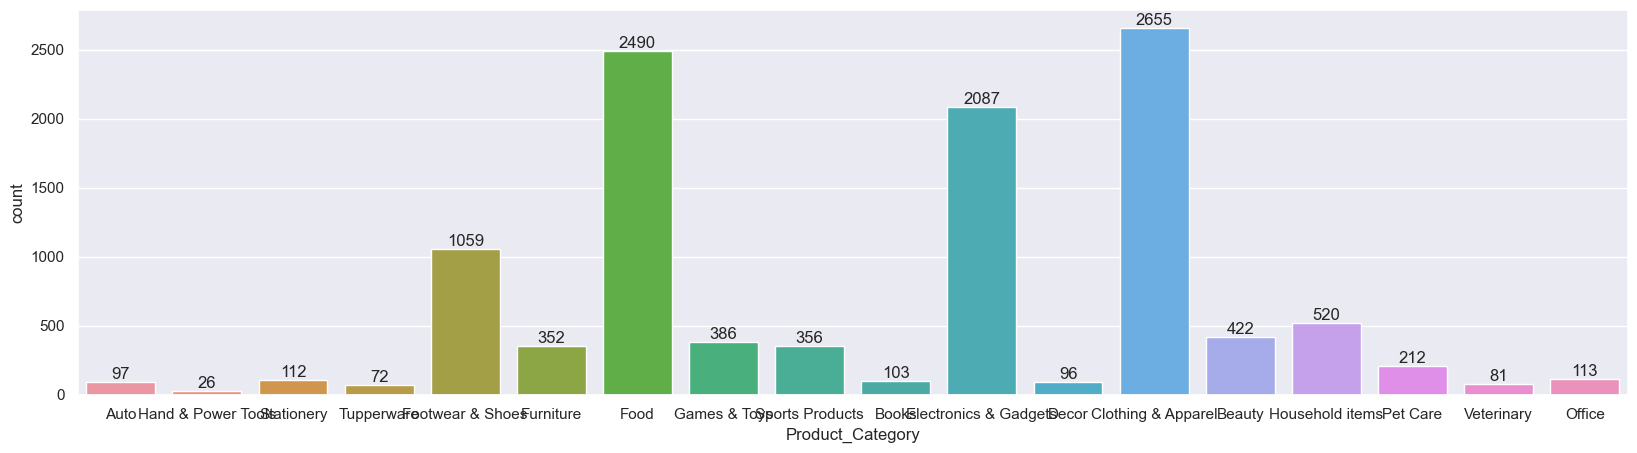

In [58]:
pc=sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize':(20,5)})
for bars in pc.containers:
    pc.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Orders'>

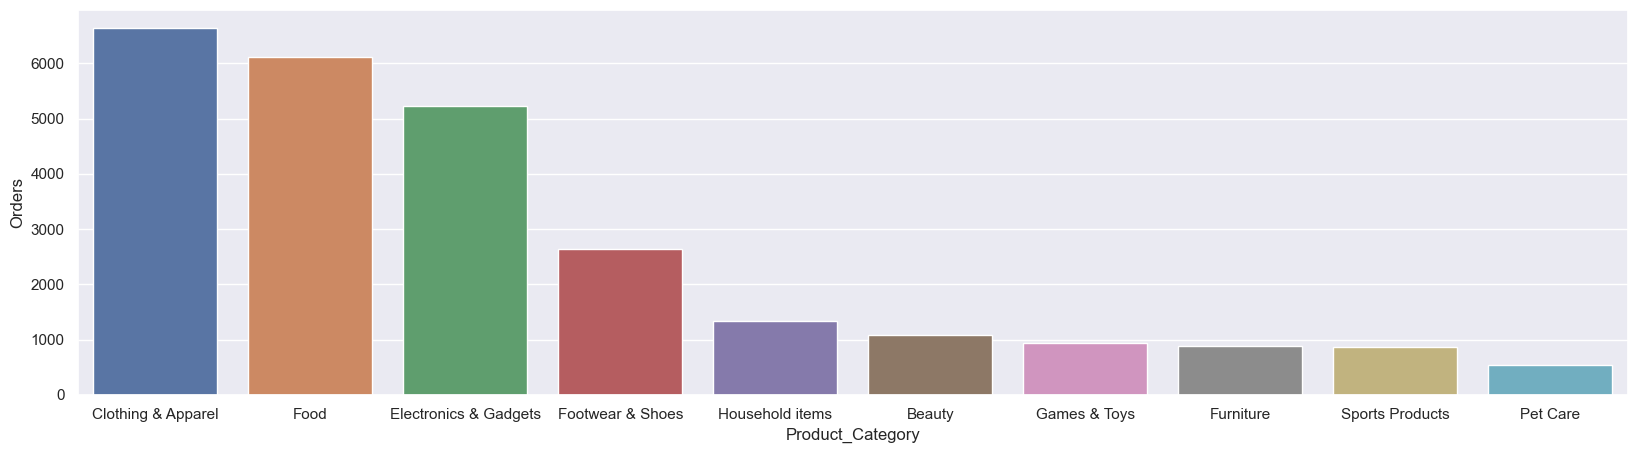

In [66]:
sales_pc=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Orders',data=sales_pc)

<Axes: xlabel='Product_Category', ylabel='Amount'>

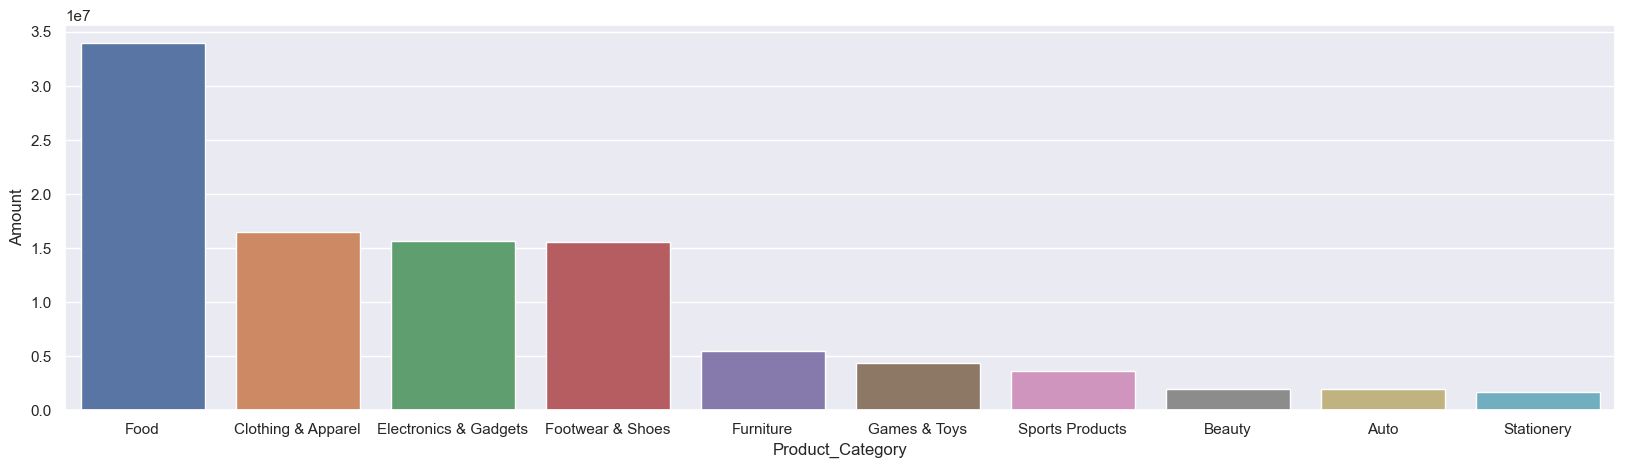

In [68]:
sales_pc=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=sales_pc)

From the above graph we can cleary see that most of the products sold in End of year sale is from Food,Clothing & Electronics category

# Conclusion:
    from the above analysis we analysed that the 
    Married women from age group of 26-35yrs from up,maharashtra,karnataka working in IT,Healthcare and aviation bought most
    of the products from Food,clothing and electronics category in End of Year SALE.